In [57]:
from keras.datasets import imdb

In [58]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [59]:
word_index = imdb.get_word_index() #word_index is a dict mapping words to integer (https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb_word_index.json)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(train_data[0])
review = ""
for i in train_data[0]:
    word = reverse_word_index.get(i-3, "?")
    review += f" {word}"

print(review)
    

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
 ? this film was just brilliant casting location scenery sto

In [60]:
# encoding the integer sequences via multi-hot encoding
# multi-hot encoding turns list into vectors of 0 & 1. For example, turning the sequence [8,5] into 10000 dimensional vector
# that would be all 0's except for index 8 and 5 which would be 1.

import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [61]:
# vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [62]:
# Building the model
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# output = relu(dot(input, W) + b)
# relu = max(0, output)
# relu provides non-linearity to neyral network

In [63]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [64]:
# sepearte validation data

val_x = x_train[:10000]
val_y = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [65]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(val_x, val_y)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7039 - loss: 0.5915 - val_accuracy: 0.8639 - val_loss: 0.3863
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8939 - loss: 0.3234 - val_accuracy: 0.8826 - val_loss: 0.3068
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9297 - loss: 0.2293 - val_accuracy: 0.8880 - val_loss: 0.2866
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9410 - loss: 0.1836 - val_accuracy: 0.8858 - val_loss: 0.2760
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9500 - loss: 0.1579 - val_accuracy: 0.8849 - val_loss: 0.2895
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9608 - loss: 0.1306 - val_accuracy: 0.8830 - val_loss: 0.2963
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9691 - loss: 0.1096 - val_accuracy: 0.8571 - val_loss: 0.3780
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9713 - loss: 0.0995 - val_accuracy: 0.8803 - v

In [66]:
history.history

{'accuracy': [0.7818666696548462,
  0.8938666582107544,
  0.9232000112533569,
  0.9384666681289673,
  0.9489333629608154,
  0.9577333331108093,
  0.9664000272750854,
  0.9710666537284851,
  0.9771999716758728,
  0.9817333221435547,
  0.9853333234786987,
  0.9865999817848206,
  0.9905333518981934,
  0.9929999709129333,
  0.996066689491272,
  0.9954000115394592,
  0.9968000054359436,
  0.9983333349227905,
  0.9977999925613403,
  0.9977999925613403],
 'loss': [0.5153060555458069,
  0.3105517029762268,
  0.23304584622383118,
  0.1869625598192215,
  0.15688136219978333,
  0.1319098174571991,
  0.11309459060430527,
  0.09940147399902344,
  0.08358369767665863,
  0.07073824852705002,
  0.060488343238830566,
  0.05502994358539581,
  0.04415077716112137,
  0.034937914460897446,
  0.02812531590461731,
  0.026567935943603516,
  0.022537920624017715,
  0.015933820977807045,
  0.015739494934678078,
  0.014746553264558315],
 'val_accuracy': [0.8639000058174133,
  0.8826000094413757,
  0.888000011444

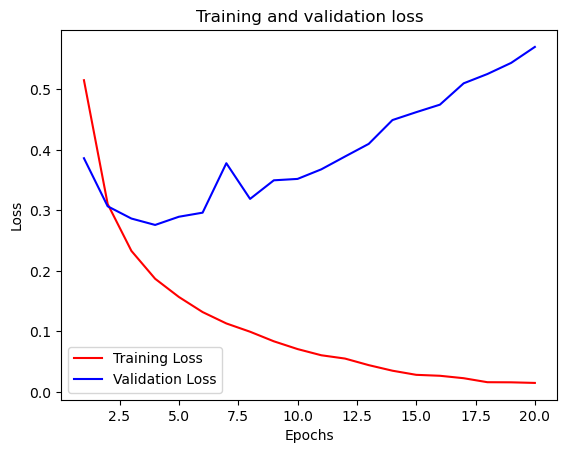

In [67]:
import matplotlib.pyplot as plt
history = history.history

loss = history["loss"]
validation_loss = history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "r", label="Training Loss") #bo blue dot
plt.plot(epochs, validation_loss, "b", label="Validation Loss") #b for solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

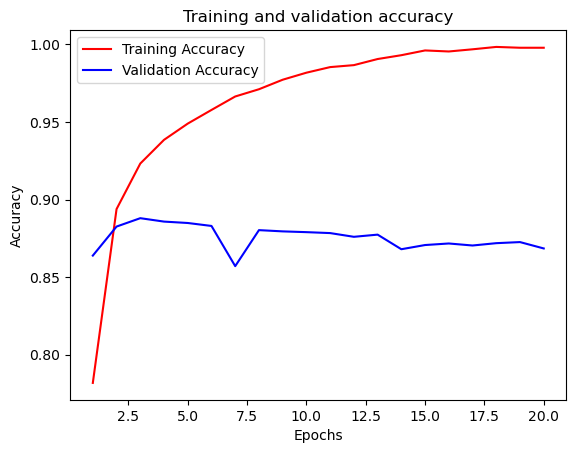

In [68]:
accuracy = history["accuracy"]
validation_accuracy = history["val_accuracy"]

plt.plot(epochs, accuracy, "r", label="Training Accuracy") #bo blue dot
plt.plot(epochs, validation_accuracy, "b", label="Validation Accuracy") #b for solid blue line
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [74]:


model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model1.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model1.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)
results = model1.evaluate(x_test, y_test)
results #0 is test loss and 1 is accuracy

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7459 - loss: 0.5480
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9001 - loss: 0.2823
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9289 - loss: 0.2087
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9383 - loss: 0.1776
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8838 - loss: 0.2882


[0.28673163056373596, 0.8857200145721436]

In [75]:
model1.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step


array([[0.20393997],
       [0.9993556 ],
       [0.8316528 ],
       ...,
       [0.092937  ],
       [0.06952261],
       [0.5059066 ]], dtype=float32)